In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.io.ascii as ascii

In [2]:
image='gl909ac-b_pueo_H2-24072002.fits'
hdu_list = fits.open(image)
hdu_list.info()

Filename: gl909ac-b_pueo_H2-24072002.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     212   (1499, 1499)   float32   


In [3]:
head = hdu_list[0].header

In [4]:
print(head['DATE'])
print(head['NAXIS1'])
print(head['NAXIS2'])

2002-07-24T13:17:32.81
1499
1499


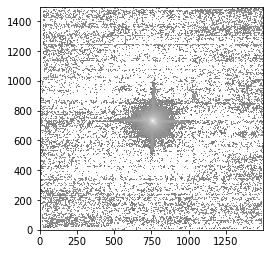

In [5]:
image =hdu_list[0].data
image[image<=-15.]=0
fig, ax= plt.subplots(1,1, figsize=(4, 8))
ax.imshow(image, cmap='gray', norm=LogNorm(),origin='lower')


In [6]:
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy import units as u
import datetime
                                            
hdu_crop = Cutout2D(image, (750,754), (128,128), wcs=WCS(head))
wcs_cropped = hdu_crop.wcs
head.update(wcs_cropped.to_header())
head['COMMENT'] = "= Cropped fits file ({}).".format(datetime.date.today())
fits.writeto('crop.fits', hdu_crop.data, head)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


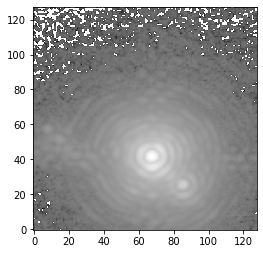

In [7]:
image2='crop.fits'
hdu_list2 = fits.open(image2)
image2=hdu_list2[0].data
image2[image2<=-15.]=0
fig, ax= plt.subplots(1,1, figsize=(4, 8))
ax.imshow(image2, cmap='gray', norm=LogNorm(),origin='lower')

In [8]:
head2 = hdu_list2[0].header

In [10]:
print(head2['NAXIS1'])
print(head2['NAXIS2'])

128
128
